In [1]:
from sklearn.datasets import fetch_openml

mnist_ = fetch_openml(name="mnist_784", version='active')

In [2]:
X = mnist_["data"]
y =mnist_["target"]

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)

In [8]:
X_reduced = pca.fit_transform(X)
X_recovered = pca.inverse_transform(X_reduced)

In [13]:
X_recovered.shape

(70000, 784)

In [10]:
pca.explained_variance_ratio_

array([0.09746116, 0.07155445, 0.06149531, 0.05403385, 0.04888934,
       0.04305227, 0.03278262, 0.02889642, 0.02758364, 0.0234214 ,
       0.02106689, 0.02037553, 0.01707064, 0.0169402 , 0.01583382,
       0.01486345, 0.01319358, 0.01279014, 0.01187272, 0.01152937,
       0.0106604 , 0.01009794, 0.00959151, 0.00909635, 0.00883287,
       0.00838818, 0.00809832, 0.00785718, 0.00740262, 0.00690014,
       0.00656144, 0.0064547 , 0.00600819, 0.00585612, 0.00566754,
       0.00543471, 0.00504717, 0.00487079, 0.00478955, 0.00467594,
       0.00454369, 0.00444918, 0.00418217, 0.00396164, 0.00383708,
       0.00375785, 0.00361426, 0.00349025, 0.00338732, 0.00319696,
       0.00316854, 0.00310145, 0.0029648 , 0.00287101, 0.00282514,
       0.00269423, 0.00268392, 0.00256509, 0.00253168, 0.00244648,
       0.00239702, 0.00238581, 0.00229234, 0.00220949, 0.0021306 ,
       0.00206317, 0.00202781, 0.00195035, 0.00191471, 0.0018855 ,
       0.00186976, 0.00180104, 0.00176787, 0.00173359, 0.00164

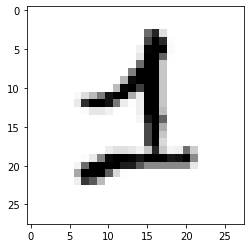

In [15]:
import matplotlib.pyplot as plt

for i in range(25):
  idx_of_some_num = i
  some_num_to_img = X[idx_of_some_num].reshape([28, 28])
  some_num = X[idx_of_some_num]
  plt.imshow(some_num_to_img, cmap="Greys")

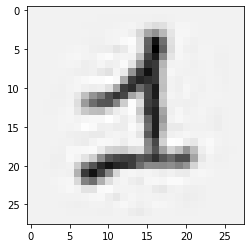

In [16]:
for i in range(25):
  idx_of_some_num = i
  some_num_to_img = X_recovered[idx_of_some_num].reshape([28, 28])
  some_num = X_recovered[idx_of_some_num]
  plt.imshow(some_num_to_img, cmap="Greys")

## Comparing times

In [18]:
randomized_PCA = PCA(n_components=154, svd_solver="randomized")
X_reduced = randomized_PCA.fit_transform(X)

* Randomized PCA finished in 11.249s

In [20]:
full_PCA = PCA(n_components=154, svd_solver="full")
X_reduced = full_PCA.fit_transform(X)

* Full PCA finished in 13.942s

## Applying IPCA (Incremental Principal Components Analysis)

In [24]:
from sklearn.decomposition import IncrementalPCA
import numpy as np
n_batches = 100
incremental_PCA = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X, n_batches):
  incremental_PCA.partial_fit(X_batch)

X_reduced_by_IPCA = incremental_PCA.transform(X)